# EDA Sample Dataset

In [3]:
# Setup and Imports
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scp
# import plotly.express as px
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit

## Load Datasets

In [4]:
sample = pd.read_csv("datasets/sample/prm800k-03-algo3-clean.csv")
sample

,id,labeler,timestamp,problem,ground_truth_answer,total_steps,ground_truth_steps,steps,neg_1,zero,pos_1
0,1,debabc6d-f79c-4ee5-a9db-5e284390254c,2022-07-30T14:37:13.296218,There are an infinite number of vectors $\math...,\begin{pmatrix} -7 \\ 16 \\ 5 \end{pmatrix},34,"[""Let's set $\\mathbf{v} = \\begin{pmatrix} a ...","[{'text': ""Let's set $\\mathbf{v} = \\begin{pm...",22,3,9
1,2,debabc6d-f79c-4ee5-a9db-5e284390254c,2022-07-30T13:26:58.414691,When rolling a certain unfair six-sided die wi...,29,35,"[""Well, let's think about this for a moment. W...","[{'text': ""Well, let's think about this for a ...",18,1,16
2,3,debabc6d-f79c-4ee5-a9db-5e284390254c,2022-07-31T14:39:30.588403,Find all solutions to\n\[\sin \left( \tan^{-1}...,3 \pm 2 \sqrt{2},34,"[""Let's set $y = \\tan^{-1} x$."", 'Then $\\cot...","[{'text': ""Let's call $\\tan^{-1}(x)=a$."", 'ra...",12,1,21
3,4,debabc6d-f79c-4ee5-a9db-5e284390254c,2022-07-29T07:48:01.714041,The solutions of the equation $z^4+4z^3i-6z^2-...,11,40,['There is a formula for the area of any conve...,[{'text': 'There is a formula for the area of ...,16,2,22
4,5,e90a38f3-3135-4465-87af-3e6322e3d772,2022-07-22T20:02:50.866783,A sequence $(a_n)$ is defined as follows:\n\[a...,-1,36,"[""So we're given that $a_{i + 1} = \\frac{1}{1...","[{'text': ""So we're given that $a_{i + 1} = \\...",7,4,25
...,...,...,...,...,...,...,...,...,...,...,...
65,440,debabc6d-f79c-4ee5-a9db-5e284390254c,2022-07-28T08:12:20.344377,Find the product $CD$ of the integers $C$ and ...,-5,17,['I think the first step here is to find the l...,[{'text': 'I think the first step here is to f...,3,0,14
66,442,d8aa7923-b970-45e1-9734-e4a7f6c4a7db,2022-07-31T22:47:06.498122,What real values of $x$ are not in the domain ...,-4,31,['To find values of $x$ that are not in the do...,[{'text': 'To find values of $x$ that are not ...,4,0,27
67,444,d8aa7923-b970-45e1-9734-e4a7f6c4a7db,2022-07-24T10:40:50.685197,How many license plates can be formed if every...,"58,500",14,"['So for the first part of the license plate, ...",[{'text': 'First we need to find the number of...,1,1,12
68,446,debabc6d-f79c-4ee5-a9db-5e284390254c,2022-07-28T07:53:49.057201,Evaluate $\log_264$.,6,5,"[""First, let's think about what this problem i...","[{'text': ""Ok, let's first break down $264$ in...",3,0,2


## Sample Fields

| Column                | Description                                |
| --------------------- | ------------------------------------------ |
| `labeler`             | Unique ID of the annotator                 |
| `timestamp`           | Annotation timestamp                       |
| `problem`             | Problem statement (usually mathematical)   |
| `ground_truth_answer` | Correct answer in LaTeX or vector notation |
| `total_steps`         | Total number of reasoning steps            |
| `steps`               | List of reasoning steps with ratings       |
| `neg_1`               | Count of steps with rating -1              |
| `zero`                | Count of steps with rating 0               |
| `pos_1`               | Count of steps with rating +1              |

The 'steps' field contains a list of reasoning steps. Each steps follows this structure:
```
{
  {
    "text": "Some reasoning text...",
    "rating": 1,
    "flagged": false
  },
  ...
}
```
Fields Explained
- text: The reasoning text generated by a model or human.
- rating: Quality label of the reasoning:
```
1: correct
0: redundant
-1: incorrect
```

## EDA

### 1. Get Total Steps Sum Each Rating

In [5]:
def get_total_steps_sum_each_rating(df):
    total_steps = int(df['total_steps'].sum())
    total_neg_1 = int(df['neg_1'].sum())
    total_zero = int(df['zero'].sum())
    total_pos_1 = int(df['pos_1'].sum())

    percentage_neg_1 = round((total_neg_1 / total_steps) * 100, 2) if total_steps else 0.0
    percentage_zero = round((total_zero / total_steps) * 100, 2) if total_steps else 0.0
    percentage_pos_1 = round((total_pos_1 / total_steps) * 100, 2) if total_steps else 0.0

    print(f"{'Rating':<12} {'Total':>10} {'Percentage':>15}")
    print("=" * 40)
    print(f"{'-1':<12} {total_neg_1:>10} {percentage_neg_1:>14.2f}%")
    print(f"{'0':<12} {total_zero:>10} {percentage_zero:>14.2f}%")
    print(f"{'+1':<12} {total_pos_1:>10} {percentage_pos_1:>14.2f}%")
    print("=" * 40)
    print(f"{'Total Steps':<12} {total_steps:>10}")

In [6]:
get_total_steps_sum_each_rating(sample)

Rating            Total      Percentage
-1                  280          21.29%
0                   104           7.91%
+1                  931          70.80%
Total Steps        1315


### 2. Total Steps Distribution

In [7]:
import matplotlib.pyplot as plt

def plot_total_steps_distribution(df):
    dist = df['total_steps'].value_counts().sort_index()
    
    plt.figure(figsize=(10, 6))
    plt.bar(dist.index, dist.values, color="#4C72B0", edgecolor="black")
    
    plt.title("Distribution of total_steps", fontsize=14)
    plt.xlabel("Total Steps", fontsize=12)
    plt.ylabel("Number of Rows", fontsize=12)
    plt.xticks(dist.index)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

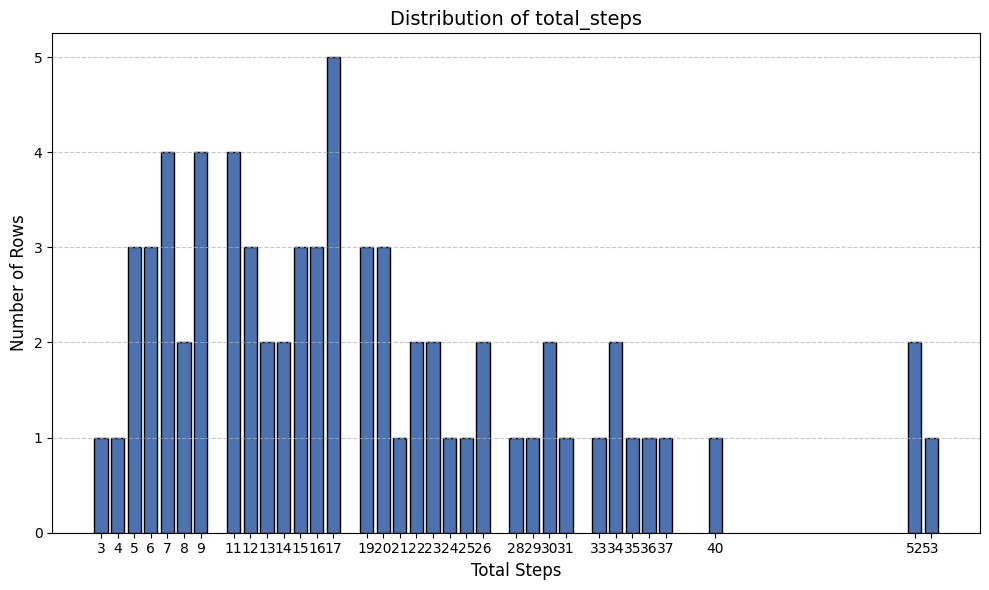

In [8]:
plot_total_steps_distribution(sample)

### 3. Negative Steps Position Distribution

In [9]:
import matplotlib.pyplot as plt
from collections import Counter
import ast

def plot_negative_steps_tertile_distribution(df):
    tertile_counter = Counter({"T1": 0, "T2": 0, "T3": 0})

    for _, row in df.iterrows():
        try:
            steps_list = ast.literal_eval(row['steps'])
            steps = []
            counter = 1
            for step in steps_list:
                if step['rating'] == -1:
                    steps.append(counter)
                counter += 1

            total_steps = row['total_steps']

            if isinstance(steps, str):
                steps = ast.literal_eval(steps)
            if not isinstance(steps, list) or total_steps == 0:
                continue

            for step in steps:
                percent_pos = (step / total_steps) * 100
                if percent_pos <= 33:
                    tertile_counter["T1"] += 1
                elif percent_pos <= 66:
                    tertile_counter["T2"] += 1
                else:
                    tertile_counter["T3"] += 1

        except Exception as e:
            print(f"Error processing row: {e}")
            continue

    # Prepare data for plotting
    tertile_labels = ["T1 (0–33%)", "T2 (34–66%)", "T3 (67–100%)"]
    counts = [tertile_counter["T1"], tertile_counter["T2"], tertile_counter["T3"]]

    # Plot
    plt.figure(figsize=(8, 5))
    plt.bar(tertile_labels, counts, color=["#1f77b4", "#ff7f0e", "#2ca02c"], edgecolor="black")
    plt.title("Tertile Distribution of Negative (-1) Steps", fontsize=14)
    plt.xlabel("Tertile Step Position", fontsize=12)
    plt.ylabel("Number of Times Marked -1", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


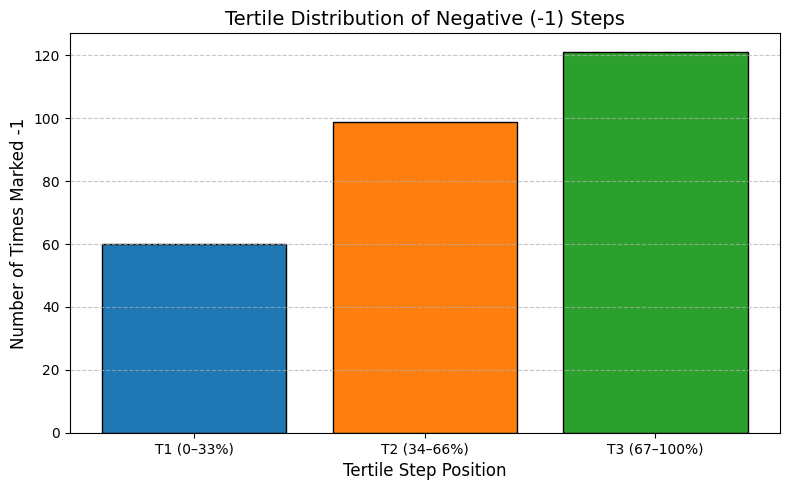

In [10]:
plot_negative_steps_tertile_distribution(sample)

### 4. Zero Steps Position Distribution

In [11]:
import matplotlib.pyplot as plt
from collections import Counter
import ast

def plot_zero_steps_tertile_distribution(df):
    tertile_counter = Counter({"T1": 0, "T2": 0, "T3": 0})

    for _, row in df.iterrows():
        try:
            steps_list = ast.literal_eval(row['steps'])
            steps = []
            counter = 1
            for step in steps_list:
                if step['rating'] == 0:
                    steps.append(counter)
                counter += 1

            total_steps = row['total_steps']

            if isinstance(steps, str):
                steps = ast.literal_eval(steps)
            if not isinstance(steps, list) or total_steps == 0:
                continue

            for step in steps:
                percent_pos = (step / total_steps) * 100
                if percent_pos <= 33:
                    tertile_counter["T1"] += 1
                elif percent_pos <= 66:
                    tertile_counter["T2"] += 1
                else:
                    tertile_counter["T3"] += 1

        except Exception as e:
            print(f"Error processing row: {e}")
            continue

    # Prepare data for plotting
    tertile_labels = ["T1 (0–33%)", "T2 (34–66%)", "T3 (67–100%)"]
    counts = [tertile_counter["T1"], tertile_counter["T2"], tertile_counter["T3"]]

    # Plot
    plt.figure(figsize=(8, 5))
    plt.bar(tertile_labels, counts, color=["#1f77b4", "#ff7f0e", "#2ca02c"], edgecolor="black")
    plt.title("Tertile Distribution of Zero (0) Steps", fontsize=14)
    plt.xlabel("Tertile Step Position", fontsize=12)
    plt.ylabel("Number of Times Marked 0", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


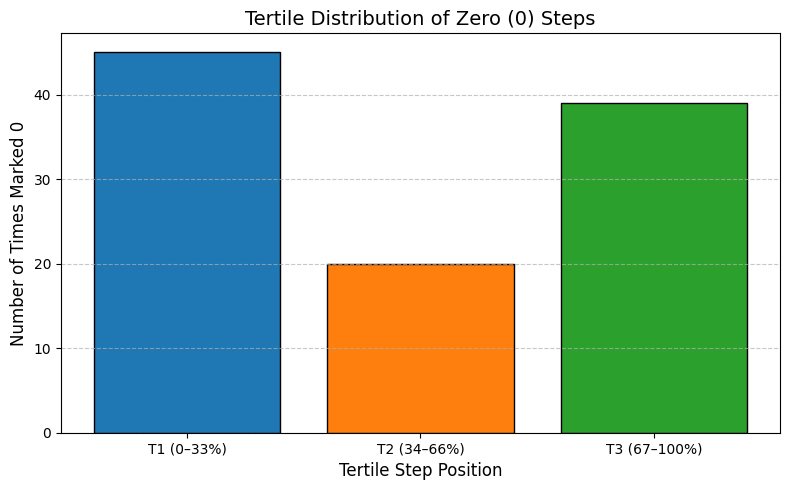

In [12]:
plot_zero_steps_tertile_distribution(sample)

### 5. Positive Steps Position Distribution

In [13]:
import matplotlib.pyplot as plt
from collections import Counter
import ast

def plot_positive_steps_tertile_distribution(df):
    tertile_counter = Counter({"T1": 0, "T2": 0, "T3": 0})

    for _, row in df.iterrows():
        try:
            steps_list = ast.literal_eval(row['steps'])
            steps = []
            counter = 1
            for step in steps_list:
                if step['rating'] == 1:
                    steps.append(counter)
                counter += 1

            total_steps = row['total_steps']

            if isinstance(steps, str):
                steps = ast.literal_eval(steps)
            if not isinstance(steps, list) or total_steps == 0:
                continue

            for step in steps:
                percent_pos = (step / total_steps) * 100
                if percent_pos <= 33:
                    tertile_counter["T1"] += 1
                elif percent_pos <= 66:
                    tertile_counter["T2"] += 1
                else:
                    tertile_counter["T3"] += 1

        except Exception as e:
            print(f"Error processing row: {e}")
            continue

    # Prepare data for plotting
    tertile_labels = ["T1 (0–33%)", "T2 (34–66%)", "T3 (67–100%)"]
    counts = [tertile_counter["T1"], tertile_counter["T2"], tertile_counter["T3"]]

    # Plot
    plt.figure(figsize=(8, 5))
    plt.bar(tertile_labels, counts, color=["#1f77b4", "#ff7f0e", "#2ca02c"], edgecolor="black")
    plt.title("Tertile Distribution of Positive (1) Steps", fontsize=14)
    plt.xlabel("Tertile Step Position", fontsize=12)
    plt.ylabel("Number of Times Marked 1", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


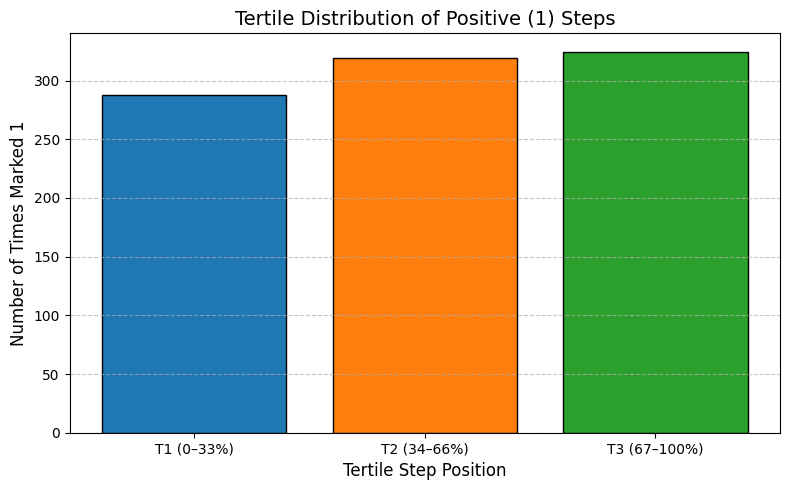

In [14]:
plot_positive_steps_tertile_distribution(sample)